1. Image preprocessing :
    1. Data Cleaning:
    Removing corrupt images from dataset
        Error ::: Image not found:workingCopy/bar/bar_0527.jpg
    2.Data Reshaping and Data Augmentation::Plotting dimensions of images:
    Size variation -> bar images  apt size = (256, 256)  [604 images] --> 528 resized. total = 602.
    Restaurant -> 450 images :: After augmentation --> 500
    

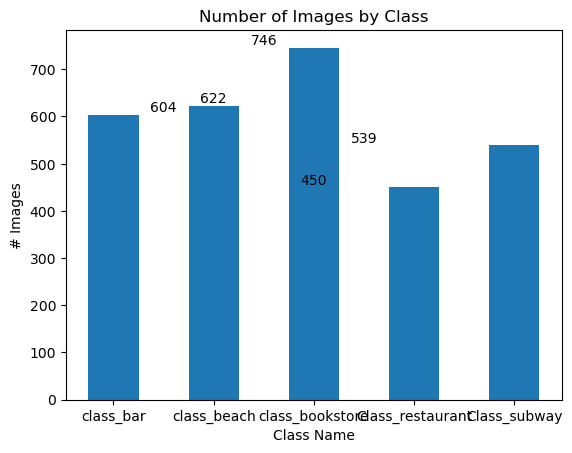

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

number_classes = {'class_bar': len(os.listdir('workingCopy/bar')),
'class_beach': len(os.listdir('workingCopy/beach')),
'class_bookstore': len(os.listdir('workingCopy/bookstore')),
'Class_restaurant': len(os.listdir('workingCopy/restaurant')),
'Class_subway': len(os.listdir('workingCopy/subway'))}
plt.bar(number_classes.keys(), number_classes.values(), width = .5);

i = 0
bar_width = 0.5
for key, value in number_classes.items():
    plt.text(i + bar_width,value,str(value), ha = 'center', va='bottom')
    i = i + bar_width

plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

dask.bag<get_dims, npartitions=202>
[########################################] | 100% Completed | 1.72 ss


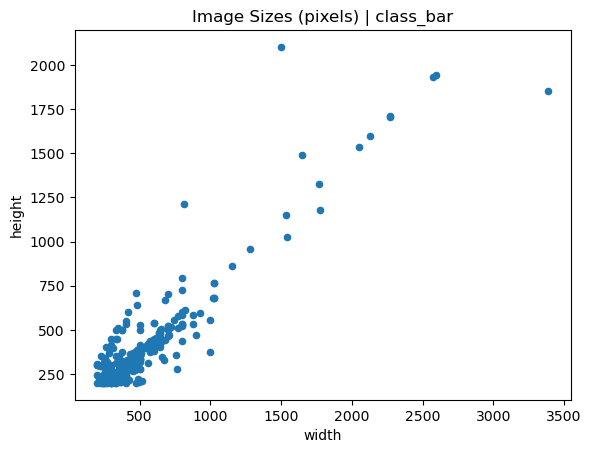

In [41]:
import dask.bag as bag
import pandas as pd
import dask.diagnostics as diagnostics
from dask.diagnostics import ProgressBar
from PIL import Image

directories = {'class_bar':'workingCopy/bar/'}
# 'class_beach': 'workingCopy/beach/',
# 'class_bookstore':'workingCopy/bookstore/',
# 'Class_restaurant':'workingCopy/restaurant/',
# 'Class_subway':'workingCopy/subway/'}


def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    h = arr.shape[0]
    w = arr.shape[1]
    return h,w

for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    print(dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

Image resizing to 256x256 and removing damaged image.

In [114]:

directories = {'class_bar':'workingCopy/bar/'}

for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    for file in filelist:
        image = cv2.imread(file)
        if image is None:
            print("Error ::: Image not found or bad image" + file)
        else:
            height, width = image.shape[:2]
            if(height!=256 and width!=256):
                print("resizing image: " + file)
                resized_image = cv2.resize(image, (256, 256))
                split = file.split("/")
                new_file_name = 'workingCopy/Resized_bar/'+ split[-1]
                print("Writing resized image: " + new_file_name)
                cv2.imwrite(new_file_name, resized_image)


resizing image: workingCopy/bar/bar_0005.jpg
Writing resized image: workingCopy/Resized_bar/bar_0005.jpg
resizing image: workingCopy/bar/bar_0006.jpg
Writing resized image: workingCopy/Resized_bar/bar_0006.jpg
resizing image: workingCopy/bar/bar_0007.jpg
Writing resized image: workingCopy/Resized_bar/bar_0007.jpg
resizing image: workingCopy/bar/bar_0008.jpg
Writing resized image: workingCopy/Resized_bar/bar_0008.jpg
resizing image: workingCopy/bar/bar_0009.jpg
Writing resized image: workingCopy/Resized_bar/bar_0009.jpg
resizing image: workingCopy/bar/bar_0010.jpg
Writing resized image: workingCopy/Resized_bar/bar_0010.jpg
resizing image: workingCopy/bar/bar_0011.jpg
Writing resized image: workingCopy/Resized_bar/bar_0011.jpg
resizing image: workingCopy/bar/bar_0012.jpg
Writing resized image: workingCopy/Resized_bar/bar_0012.jpg
resizing image: workingCopy/bar/bar_0021.jpg
Writing resized image: workingCopy/Resized_bar/bar_0021.jpg
resizing image: workingCopy/bar/bar_0024.jpg
Writing re

resizing image: workingCopy/bar/bar_0125.jpg
Writing resized image: workingCopy/Resized_bar/bar_0125.jpg
resizing image: workingCopy/bar/bar_0126.jpg
Writing resized image: workingCopy/Resized_bar/bar_0126.jpg
resizing image: workingCopy/bar/bar_0127.jpg
Writing resized image: workingCopy/Resized_bar/bar_0127.jpg
resizing image: workingCopy/bar/bar_0128.jpg
Writing resized image: workingCopy/Resized_bar/bar_0128.jpg
resizing image: workingCopy/bar/bar_0129.jpg
Writing resized image: workingCopy/Resized_bar/bar_0129.jpg
resizing image: workingCopy/bar/bar_0130.jpg
Writing resized image: workingCopy/Resized_bar/bar_0130.jpg
resizing image: workingCopy/bar/bar_0131.jpg
Writing resized image: workingCopy/Resized_bar/bar_0131.jpg
resizing image: workingCopy/bar/bar_0132.jpg
Writing resized image: workingCopy/Resized_bar/bar_0132.jpg
resizing image: workingCopy/bar/bar_0133.jpg
Writing resized image: workingCopy/Resized_bar/bar_0133.jpg
resizing image: workingCopy/bar/bar_0134.jpg
Writing re

resizing image: workingCopy/bar/bar_0224.jpg
Writing resized image: workingCopy/Resized_bar/bar_0224.jpg
resizing image: workingCopy/bar/bar_0225.jpg
Writing resized image: workingCopy/Resized_bar/bar_0225.jpg
resizing image: workingCopy/bar/bar_0226.jpg
Writing resized image: workingCopy/Resized_bar/bar_0226.jpg
resizing image: workingCopy/bar/bar_0227.jpg
Writing resized image: workingCopy/Resized_bar/bar_0227.jpg
resizing image: workingCopy/bar/bar_0228.jpg
Writing resized image: workingCopy/Resized_bar/bar_0228.jpg
resizing image: workingCopy/bar/bar_0229.jpg
Writing resized image: workingCopy/Resized_bar/bar_0229.jpg
resizing image: workingCopy/bar/bar_0230.jpg
Writing resized image: workingCopy/Resized_bar/bar_0230.jpg
resizing image: workingCopy/bar/bar_0231.jpg
Writing resized image: workingCopy/Resized_bar/bar_0231.jpg
resizing image: workingCopy/bar/bar_0232.jpg
Writing resized image: workingCopy/Resized_bar/bar_0232.jpg
resizing image: workingCopy/bar/bar_0233.jpg
Writing re

resizing image: workingCopy/bar/bar_0328.jpg
Writing resized image: workingCopy/Resized_bar/bar_0328.jpg
resizing image: workingCopy/bar/bar_0329.jpg
Writing resized image: workingCopy/Resized_bar/bar_0329.jpg
resizing image: workingCopy/bar/bar_0331.jpg
Writing resized image: workingCopy/Resized_bar/bar_0331.jpg
resizing image: workingCopy/bar/bar_0332.jpg
Writing resized image: workingCopy/Resized_bar/bar_0332.jpg
resizing image: workingCopy/bar/bar_0333.jpg
Writing resized image: workingCopy/Resized_bar/bar_0333.jpg
resizing image: workingCopy/bar/bar_0334.jpg
Writing resized image: workingCopy/Resized_bar/bar_0334.jpg
resizing image: workingCopy/bar/bar_0335.jpg
Writing resized image: workingCopy/Resized_bar/bar_0335.jpg
resizing image: workingCopy/bar/bar_0336.jpg
Writing resized image: workingCopy/Resized_bar/bar_0336.jpg
resizing image: workingCopy/bar/bar_0337.jpg
Writing resized image: workingCopy/Resized_bar/bar_0337.jpg
resizing image: workingCopy/bar/bar_0338.jpg
Writing re

resizing image: workingCopy/bar/bar_0425.jpg
Writing resized image: workingCopy/Resized_bar/bar_0425.jpg
resizing image: workingCopy/bar/bar_0426.jpg
Writing resized image: workingCopy/Resized_bar/bar_0426.jpg
resizing image: workingCopy/bar/bar_0427.jpg
Writing resized image: workingCopy/Resized_bar/bar_0427.jpg
resizing image: workingCopy/bar/bar_0428.jpg
Writing resized image: workingCopy/Resized_bar/bar_0428.jpg
resizing image: workingCopy/bar/bar_0429.jpg
Writing resized image: workingCopy/Resized_bar/bar_0429.jpg
resizing image: workingCopy/bar/bar_0430.jpg
Writing resized image: workingCopy/Resized_bar/bar_0430.jpg
resizing image: workingCopy/bar/bar_0431.jpg
Writing resized image: workingCopy/Resized_bar/bar_0431.jpg
resizing image: workingCopy/bar/bar_0432.jpg
Writing resized image: workingCopy/Resized_bar/bar_0432.jpg
resizing image: workingCopy/bar/bar_0433.jpg
Writing resized image: workingCopy/Resized_bar/bar_0433.jpg
resizing image: workingCopy/bar/bar_0434.jpg
Writing re

Error ::: Image not found or bad imageworkingCopy/bar/bar_0527.jpg
resizing image: workingCopy/bar/bar_0528.jpg
Writing resized image: workingCopy/Resized_bar/bar_0528.jpg
resizing image: workingCopy/bar/bar_0529.jpg
Writing resized image: workingCopy/Resized_bar/bar_0529.jpg
resizing image: workingCopy/bar/bar_0530.jpg
Writing resized image: workingCopy/Resized_bar/bar_0530.jpg
resizing image: workingCopy/bar/bar_0531.jpg
Writing resized image: workingCopy/Resized_bar/bar_0531.jpg
resizing image: workingCopy/bar/bar_0532.jpg
Writing resized image: workingCopy/Resized_bar/bar_0532.jpg
resizing image: workingCopy/bar/bar_0533.jpg
Writing resized image: workingCopy/Resized_bar/bar_0533.jpg
resizing image: workingCopy/bar/bar_0534.jpg
Writing resized image: workingCopy/Resized_bar/bar_0534.jpg
resizing image: workingCopy/bar/bar_0535.jpg
Writing resized image: workingCopy/Resized_bar/bar_0535.jpg
resizing image: workingCopy/bar/bar_0536.jpg
Writing resized image: workingCopy/Resized_bar/b

In [117]:
print(len(os.listdir('workingCopy/new_bar')))

602


In [116]:
directories = {'class_bar':'workingCopy/bar/'}

for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    for file in filelist:
        image = cv2.imread(file)
        if image is None:
            print("Error ::: Image not found or bad image" + file)
        else:
            height, width = image.shape[:2]
            if(height==256 and width==256):
                split = file.split("/")
                new_file_name = 'workingCopy/new_bar/'+ split[-1]
                cv2.imwrite(new_file_name, image)

Error ::: Image not found or bad imageworkingCopy/bar/bar_0527.jpg


In [118]:
directories = {'class_bar':'workingCopy/bar/',
'class_beach': 'workingCopy/beach/',
'class_bookstore':'workingCopy/bookstore/',
'Class_restaurant':'workingCopy/restaurant/',
'Class_subway':'workingCopy/subway/',
'Class_subway':'workingCopy/Resized_bar/'}

for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    for file in filelist:
        image = cv2.imread(file)
        if image is None:
            print("Error ::: Image not found or bad image" + file)

Error ::: Image not found or bad imageworkingCopy/bar/bar_0527.jpg


Data augmentation on Restaurant images:

1. images flipped in x (mirrored images).
2. images grayscaled.
3. Sharpening images a little.
4. Change in contrast and brightness.


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
filepath = 'workingCopy/restaurant/'
filelist = [filepath + f for f in os.listdir(filepath)]

#20 random images flipped in x:
for i in range(0,19):
    ramdom_file = random.choice(filelist)
    image = cv2.imread(ramdom_file)
    fliped_image = cv2.flip(image,1)
    split = ramdom_file.split("/")
    new_file_name = 'workingCopy/augmentedRestaurant/'+ split[-1]
    cv2.imwrite(new_file_name, fliped_image)
    
#5 random images grayscaled:
for i in range(0,6):
    ramdom_file = random.choice(filelist)
    image = cv2.imread(ramdom_file)
    fliped_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    split = ramdom_file.split("/")
    new_file_name = 'workingCopy/augmentedRestaurant/'+ split[-1]
    cv2.imwrite(new_file_name, fliped_image)

#25 images Sharpening and contrast changes along with mirroring
for i in range(0,26):
    ramdom_file = random.choice(filelist)
    image = cv2.imread(ramdom_file)
    contrast = 1.5
    brightness = 10
    new_image = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness) 
    new_image = cv2.flip(new_image,1)
    split = ramdom_file.split("/")
    new_file_name = 'workingCopy/augmentedRestaurant/'+ split[-1]
    cv2.imwrite(new_file_name, new_image)
    
    
    